# Exercise 7.1
ให้นักศึกษาทดลองจำแนกข้อมูล diabetes.csv (โรคเบาหวาน) โดย download ข้อมูลจากเว็บไซต์ https://www.kaggle.com/saurabh00007/diabetescsv/version/1
โดยข้อกำหนดดังต่อไปนี้
1.  explore data เพื่อดูรายละเอียดของข้อมูล และ plot graph 
2.  ทดลองจำแนกข้อมูลโดยใช้ค่า k ตั้งแต่ 1 3 5 7 9  เพื่อหาค่าที่มีประสิทธิภาพที่ดีที่สุด  แล้ว plot graphแสดงผล
3. นำโมเดลที่ได้จากค่า k ที่ดีที่สุดมาแสดงค่าประสิทธิภาพในรูปแบบของ Classification Report ที่แสดง precision recall f-measure 
4. นำโมเดลที่เลือกมาทดลองจำแนกกับชุดข้อมูลใหม่ (ให้หาเอง) ประมาณ 3 ตัวอย่าง แล้วแสดงผลการจำแนกให้ดู

In [69]:
import os
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
diabetes = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes (2).csv


In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [71]:
from sklearn import neighbors

In [72]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
diabetes.keys

<bound method NDFrame.keys of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

In [74]:
diabetes.Pregnancies

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [75]:
print("Dataset Shape: ",diabetes.shape)
diabetes.describe()

Dataset Shape:  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
from sklearn.model_selection import train_test_split

X = diabetes.iloc[:,0:8]
y = diabetes.iloc[:,8]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b03c52710>,
      dtype=object)

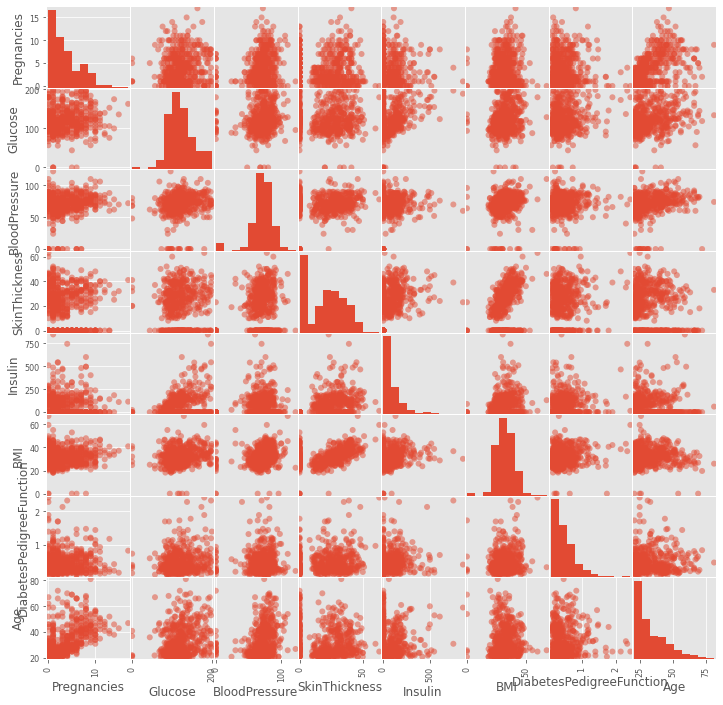

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
diabetes = pd.DataFrame(X_train)
pd.plotting.scatter_matrix(diabetes, figsize=(12,12), marker="o")

In [78]:
#Setup arrays to store training and test accuracies
from sklearn.neighbors import KNeighborsClassifier


neighbors = [old for old in range(1,10) if old % 2 != 0]
#print(neighbors)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
 

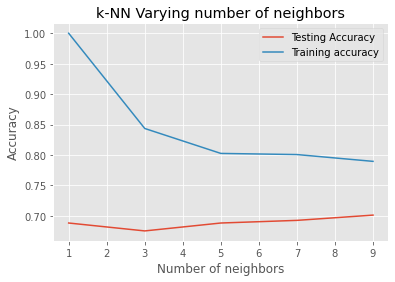

In [79]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy, label='Testing Accuracy')
plt.plot(neighbors,train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [80]:
from sklearn import neighbors

# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=9)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [81]:
from sklearn.metrics import classification_report

#Measures of the predicted values
print(classification_report(y_test,knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       151
           1       0.57      0.59      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



In [82]:
from sklearn.metrics import accuracy_score

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.7895716945996276
Test data accuracy: 0.7012987012987013


In [83]:
print(knn_model.predict(X_test))

[1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [84]:
unseen_data = [
                [6,148,72,35,0,33.6,0.627,50 ]
               ]
# print(unseen_data)
print(knn_model.predict(unseen_data))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
